# Getting the plate_id out of a picture

### Running a yolo model to detect the **sticker**


0: 384x640 1 plateid, 46.0ms
Speed: 1.8ms preprocess, 46.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


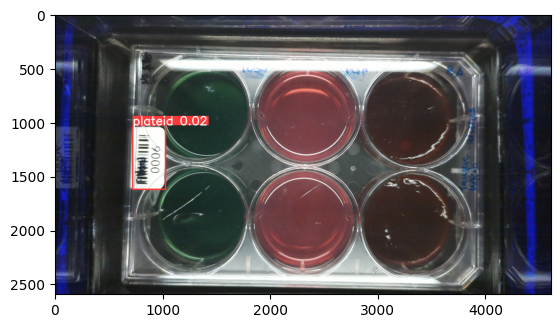

In [36]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np


model_path = 'models/sample_model/detect-plateid.pt'
model = YOLO(model_path)

image_path = 'tests/Picture_Micro_2023-11-21_18:22:32.jpg'
#image_path = 'tests/test_image.jpg'

img = cv2.imread(image_path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H, W, _ = img.shape

results = model(img, conf = 0.014, iou = 0.7)
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.show()

In [37]:
if results[0].boxes:
    print('Hey')
else: 
    print('Nothing')

Hey


### Crop and rotate 90 degrees clockwise
* Store final sticker image of plate_id into **rotatedCrop**

In [26]:
# Assuming len(results)==1
box = results[0].boxes.xyxy.numpy().astype(int)[0]
crop = img[box[1]:box[3], box[0]:box[2]]
rotatedCrop = np.rot90(crop, k=-1)

### Perform **OCR** on **rotatedCrop**

In [27]:
import easyocr

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Perform OCR (only look for NUMERICAL digits)
results = reader.readtext(rotatedCrop)
numerical_characters = ''.join([entry[1] for entry in results if entry[1].isdigit()])

# Introducte the expected number of digits
expected_digits = 4

# The desired output should have 
if len(numerical_characters)==expected_digits:
    #go ahead
    print(numerical_characters)
else:
    print("Unable to detect plate_id")